In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
df= pd.read_csv("tested.csv",sep=',')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Handeling Data

In [5]:

df = df.drop(columns=[ 'Name', 'Cabin', 'Ticket'])
display(df)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


In [6]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [7]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [8]:
mean_age = np.mean(df.loc[~np.isnan(df['Age']), 'Age'])
df.loc[np.isnan(df['Age']), 'Age'] = mean_age

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [11]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.50000,0,0,7.8292,Q
1,893,1,3,female,47.00000,1,0,7.0000,S
2,894,0,2,male,62.00000,0,0,9.6875,Q
3,895,0,3,male,27.00000,0,0,8.6625,S
4,896,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.27259,0,0,8.0500,S
414,1306,1,1,female,39.00000,0,0,108.9000,C
415,1307,0,3,male,38.50000,0,0,7.2500,S
416,1308,0,3,male,30.27259,0,0,8.0500,S


In [12]:

df['Age']=df['Age'].astype('int64')


In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34,0,0,7.8292,Q
1,893,1,3,female,47,1,0,7.0000,S
2,894,0,2,male,62,0,0,9.6875,Q
3,895,0,3,male,27,0,0,8.6625,S
4,896,1,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30,0,0,8.0500,S
414,1306,1,1,female,39,0,0,108.9000,C
415,1307,0,3,male,38,0,0,7.2500,S
416,1308,0,3,male,30,0,0,8.0500,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


In [15]:
df['Sex']=df['Sex'].replace(['female', 'male'],[0, 1]) ##(,inplace = true)

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34,0,0,7.8292,Q
1,893,1,3,0,47,1,0,7.0000,S
2,894,0,2,1,62,0,0,9.6875,Q
3,895,0,3,1,27,0,0,8.6625,S
4,896,1,3,0,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30,0,0,8.0500,S
414,1306,1,1,0,39,0,0,108.9000,C
415,1307,0,3,1,38,0,0,7.2500,S
416,1308,0,3,1,30,0,0,8.0500,S


In [17]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [18]:
df['Fare'] = df['Fare'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Sex          418 non-null    int64 
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Fare         418 non-null    int64 
 8   Embarked     418 non-null    object
dtypes: int64(8), object(1)
memory usage: 29.5+ KB


In [19]:
for Embarkeds in df['Embarked'].unique():
    print("->",Embarkeds)

-> Q
-> S
-> C


In [20]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
 2   Pclass       418 non-null    int64
 3   Sex          418 non-null    int64
 4   Age          418 non-null    int64
 5   SibSp        418 non-null    int64
 6   Parch        418 non-null    int64
 7   Fare         418 non-null    int64
 8   Embarked     418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB


In [22]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34,0,0,7,0
1,893,1,3,0,47,1,0,7,1
2,894,0,2,1,62,0,0,9,0
3,895,0,3,1,27,0,0,8,1
4,896,1,3,0,22,1,1,12,1
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30,0,0,8,1
414,1306,1,1,0,39,0,0,108,2
415,1307,0,3,1,38,0,0,7,1
416,1308,0,3,1,30,0,0,8,1


# Analysis

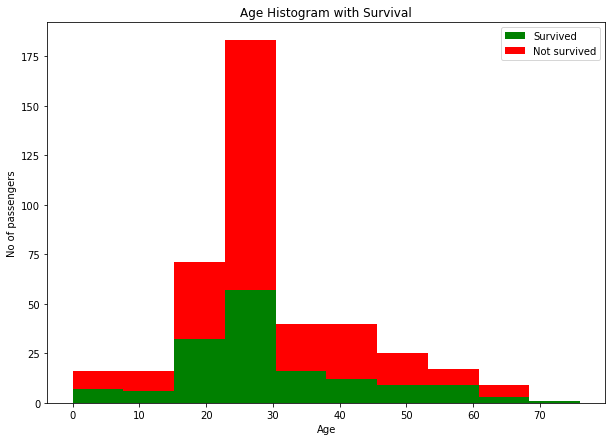

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()


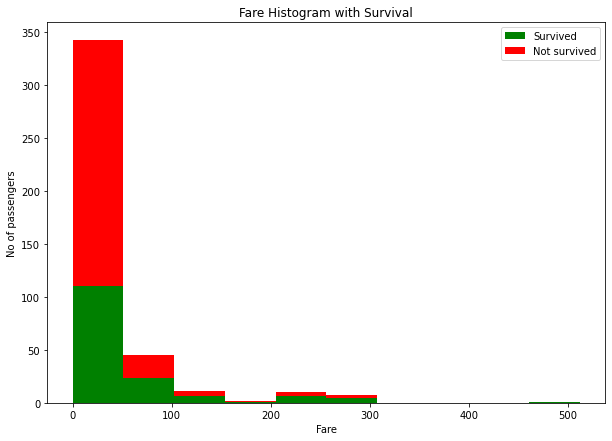

In [24]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

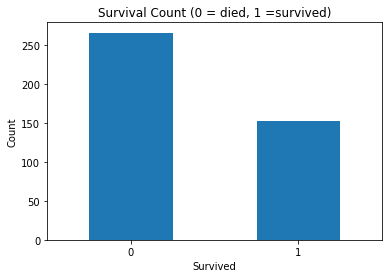

In [25]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = died, 1 =survived)')

# Show the plot
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


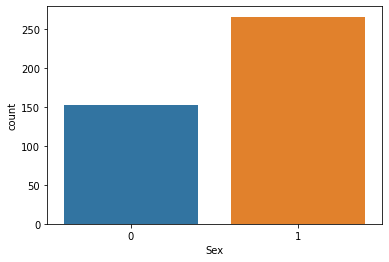

In [26]:
sns.countplot(df["Sex"])
plt.show()

# Split Data

In [27]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 21)

In [29]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1150,2,0,19,0,0,13,1
134,1026,3,1,43,0,0,7,1
405,1297,2,1,20,0,0,13,2
6,898,3,0,30,0,0,7,0
223,1115,3,1,21,0,0,7,1


# Model

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_mlp)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_mlp))
print("Classification_Report: \n",classification_report(y_test,y_pred_mlp))

Training set score: 0.91
Test set score: 0.92
Accuracy Score: 0.92
Confusion Matrix: 
 [[63  1]
 [ 7 34]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        64
           1       0.97      0.83      0.89        41

    accuracy                           0.92       105
   macro avg       0.94      0.91      0.92       105
weighted avg       0.93      0.92      0.92       105



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
